# Bank Institution Term Deposit Predictive Model

**Client : Bank of Portugal**

### Business Need
The investment and portfolio department for Bank of Portugal wants to be able to identify the customers who potentially would subscribe to term deposits. There has been heightened interest of marketing managers to carefully tune their directed campaigns to the rigorous selection of contacts, therefore, the goal of the employer (Bank of Portugal) is to find an effective model that can predict which future clients would subscribe to their term deposits.

**Why do we need an effective predictive model?**

An effective predictive model can help increase the campaign efficiency as they would be able to identify customers who would subscribe to their term deposit, therby direct their marketing efforts to them. Additionally the model will help them better manage their resources (human effort, phone calls, time, etc.)

The Bank of Portugal, therefore, collected a huge amount of data that includes customer profiles of those who have subscribed to term deposits and the ones who did not subscribe to a term deposit to be used as basis for analysis.

To come up with an effective predictive model, this project will cover:
1. [Data Exploration]()
2. [Data Cleaning]()
3. [Feature Extraction]() and
4. [Development of Robust Machine Learning Algorithms]()

First, we access and understand the features of our data.

### Data and Features
The data for this project is a 20 features and one target variable dataset found [here](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data source has multiple datasets but we will be using the bank-additional-full.csv found [here](http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip) dataset.

The 20 features in our dataset are equally distributed into categorical and numerical features, i.e. 10 categorical features and 10 numerical features.

**Categorical Features:**

1. *job* - type of job of customer ('admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
2. *marital* - marital status of a customer ('divorced', 'married', 'single', 'unknown')
3. *education* - education level of the customer ('basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
4. *default* - whether the customer has credit in default ('no', 'yes', 'unknown')
5. *housing* - whether customer has housing loan ('no', 'yes', 'unknown')
6. *loan* - whether customer has personal loan ('no', 'yes', 'unknown')
7. *contact* - contact communication type ('cellular', 'telephone')
8. *month* - last contact month of year
9. *day_of_week* - last contact day of the week ('mon',...,'fri')
10. *poutcome* - outcome of the previous marketing campaign ('failure', 'nonexistent', 'success')

**Numerical Features:**

1. *age* - age of customer
2. *duration* - last contact duration, in seconds. It is also, important to note that this feature has been stated to highly affect the output target directly. We will therefore, just include it for benchmark purpose but discard it to have a realistic predictive model.
3. *campaign* - number of contacts performed during this campaign and for a specific customer.
4. *pdays* - number of days that passed by after the client was last contacted from a previous campaign. (999 means a customer wan not previously contacted)
5. *previous* - number of contacts performed before this campaign and for this customer.
6. *emp.var.rate* - employment variation rate (quarterly indicator)
7. *cons.price.idx* - consumer price index (monthly indicator)
8. *cons.conf.idx* - consumer confidence index (monthly indicator)
9. *euribor3m* - euribor 3 month rate (daily indicator)
10. *nr.employed* - number of employees (quarterly indicator)

**Target Variable**
* *y* - if the client has subscribed for a term deposit ('yes', 'no')

In [4]:
import pandas as pd

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

In [3]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


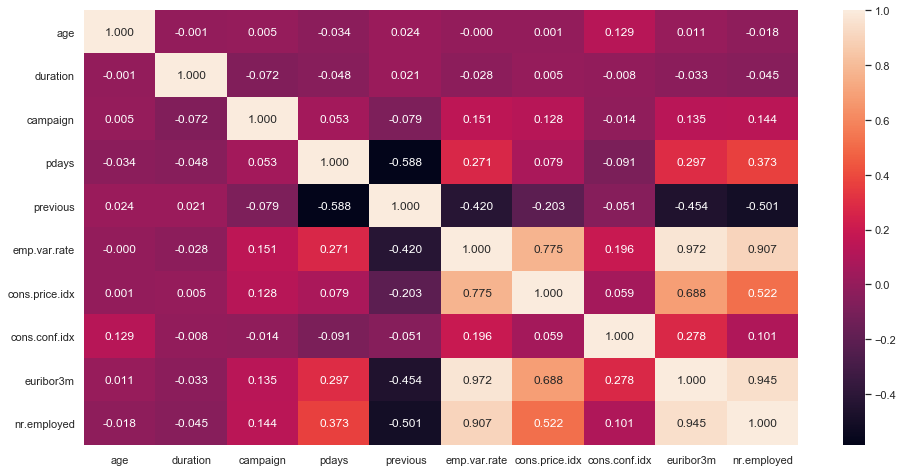

In [5]:
f, ax = plt.subplots(figsize = (16, 8))
corr = dataset.corr()
sns.heatmap(corr, annot = True, fmt = '.3f', annot_kws = {'size':12}, xticklabels = corr.columns.values, yticklabels = corr.columns.values)